# import libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("results.csv")
print("Shape od data= ", df.shape)
df.head()

Shape od data=  (137, 3)


,ID,0,1
0,20201116-121822IMG_0310-1 resized.jpg,-6.422555,-1.447713
1,20201116-131406IMG_8417-1 resized.jpg,-1.157465,-3.920088
2,20201116-142909IMG_2038-1 resized.jpg,0.653289,4.704874
3,one_30.jpg-1 resized.jpg,6.428168,-2.816422
4,20201116-123847IMG_7869-1 resized.jpg,-3.767290,3.507706


# Undersranding the data 

Text(0.5, 1.0, 'TSNE Reduced data')

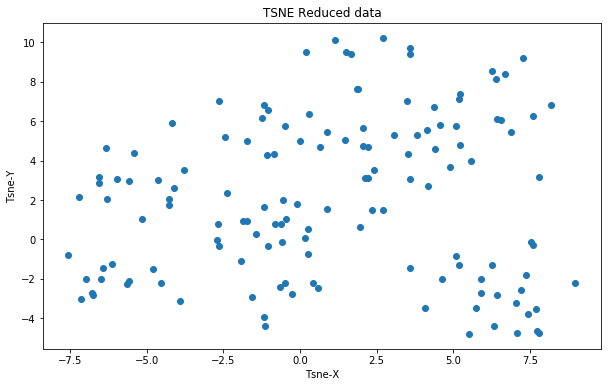

In [3]:


plt.figure(figsize=(10,6))
plt.scatter(df['0'],df['1'])
plt.xlabel('Tsne-X')
plt.ylabel('Tsne-Y')
plt.title('TSNE Reduced data')



In [4]:
# X = df['0']
# Y= df['1']

X = df.iloc[:,[1,2]].values
X[:5]

array([[-6.42255497, -1.44771349],
       [-1.15746486, -3.92008829],
       [ 0.65328872,  4.70487404],
       [ 6.4281683 , -2.81642175],
       [-3.76729012,  3.50770617]])

# Finding the number of clusters 

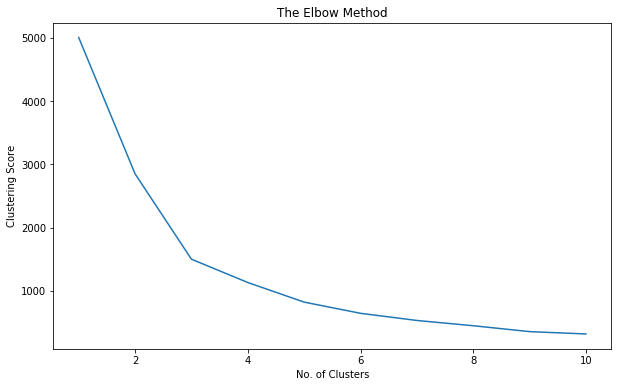

In [5]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
#find the ideal size of K-numerically    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [6]:
# print(clustering_score)

# def number_clusters(clustering_score):
#     ideal=[]

#     for i in range(len(clustering_score)):
#         x1=i
#         x2=(i+1)
#         y1= clustering_score[i]
#         y2= clustering_score[(i+1)]
        
#         slopq1
        
#         print('x1:', x1  , 'y1:',y1)
#         print('x2:', x2  , 'y2:',y2)
 
# number_clusters(clustering_score)

# ideal numbder of clusters =  2 or 3

### K=2

In [7]:
kmeans= KMeans(n_clusters = 2, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred


array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0], dtype=int32)

In [8]:



df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
num = len(df['Cluster'].value_counts())

print('Number of clusters:',num)
df


Number of data points in each cluster= 
 1    72
0    65
Name: Cluster, dtype: int64
Number of clusters: 2


,ID,0,1,Cluster
0,20201116-121822IMG_0310-1 resized.jpg,-6.422555,-1.447713,0
1,20201116-131406IMG_8417-1 resized.jpg,-1.157465,-3.920088,0
2,20201116-142909IMG_2038-1 resized.jpg,0.653289,4.704874,1
3,one_30.jpg-1 resized.jpg,6.428168,-2.816422,1
4,20201116-123847IMG_7869-1 resized.jpg,-3.767290,3.507706,0
...,...,...,...,...
132,20201116-142743IMG_1999-1 resized.jpg,2.218155,3.094843,1
133,20201116-142758IMG_2015-1 resized.jpg,2.128971,3.125167,1
134,one_18.jpg-1 resized.jpg,5.898341,-2.742724,1
135,20201116-131427IMG_1176-1 resized.jpg,-1.421241,0.282513,0


In [9]:
#Save This into csv format 
df.to_csv('ClusteringResults/export-'+str(num)+'.csv',index=False , header = True)
# df.to_csv(r'/home/noragami/Documents/clustering_dolphin/image-similarity-clustering/CSV_file_transfer/export-'+str(num)+'.csv',index=False , header = True )

### K=3

In [10]:
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred


array([2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 2,
       2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0,
       1, 1, 0, 2, 2], dtype=int32)

In [11]:

print('Number of clusters:',num)

df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
num = len(df['Cluster'].value_counts())
df



Number of clusters: 2
Number of data points in each cluster= 
 2    60
1    54
0    23
Name: Cluster, dtype: int64


,ID,0,1,Cluster
0,20201116-121822IMG_0310-1 resized.jpg,-6.422555,-1.447713,2
1,20201116-131406IMG_8417-1 resized.jpg,-1.157465,-3.920088,2
2,20201116-142909IMG_2038-1 resized.jpg,0.653289,4.704874,1
3,one_30.jpg-1 resized.jpg,6.428168,-2.816422,0
4,20201116-123847IMG_7869-1 resized.jpg,-3.767290,3.507706,2
...,...,...,...,...
132,20201116-142743IMG_1999-1 resized.jpg,2.218155,3.094843,1
133,20201116-142758IMG_2015-1 resized.jpg,2.128971,3.125167,1
134,one_18.jpg-1 resized.jpg,5.898341,-2.742724,0
135,20201116-131427IMG_1176-1 resized.jpg,-1.421241,0.282513,2


In [12]:
#Save This into csv format 
df.to_csv('ClusteringResults/export-'+str(num)+'.csv',index=False , header = True)
# df.to_csv(r'/home/noragami/Documents/clustering_dolphin/image-similarity-clustering/CSV_file_transfer/export-'+str(num)+'.csv',index=False , header = True )

# 4 clusters 

In [13]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred


array([2, 0, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 3, 2, 1, 0,
       0, 1, 0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 3, 0, 2, 0, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 2, 3, 0, 1,
       3, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 0, 1, 1, 3, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 3, 0, 1, 1, 0, 1, 3, 0, 2, 1, 3, 1, 2, 0, 1, 1, 3, 3, 2, 0,
       0, 1, 1, 1, 3, 0, 0, 2, 3, 2, 0, 0, 0, 1, 0, 1, 2, 1, 3, 3, 2, 3,
       1, 1, 3, 0, 2], dtype=int32)

In [14]:

print('Number of clusters:',num)

df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
num = len(df['Cluster'].value_counts())
df


Number of clusters: 3
Number of data points in each cluster= 
 1    51
0    35
2    28
3    23
Name: Cluster, dtype: int64


,ID,0,1,Cluster
0,20201116-121822IMG_0310-1 resized.jpg,-6.422555,-1.447713,2
1,20201116-131406IMG_8417-1 resized.jpg,-1.157465,-3.920088,0
2,20201116-142909IMG_2038-1 resized.jpg,0.653289,4.704874,1
3,one_30.jpg-1 resized.jpg,6.428168,-2.816422,3
4,20201116-123847IMG_7869-1 resized.jpg,-3.767290,3.507706,2
...,...,...,...,...
132,20201116-142743IMG_1999-1 resized.jpg,2.218155,3.094843,1
133,20201116-142758IMG_2015-1 resized.jpg,2.128971,3.125167,1
134,one_18.jpg-1 resized.jpg,5.898341,-2.742724,3
135,20201116-131427IMG_1176-1 resized.jpg,-1.421241,0.282513,0


In [15]:

#Save This into csv format 
df.to_csv('ClusteringResults/export-'+str(num)+'.csv',index=False , header = True)
# df.to_csv(r'/home/noragami/Documents/clustering_dolphin/image-similarity-clustering/CSV_file_transfer/export-'+str(num)+'.csv',index=False , header = True )

# 6 clusters 

In [16]:

kmeans= KMeans(n_clusters = 6, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

print('Number of clusters:',num)

df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
num = len(df['Cluster'].value_counts())
df

#Save This into csv format 
df.to_csv('ClusteringResults/export-'+str(num)+'.csv',index=False , header = True)
# df.to_csv(r'/home/noragami/Documents/clustering_dolphin/image-similarity-clustering/CSV_file_transfer/export-'+str(num)+'.csv',index=False , header = True )

Number of clusters: 4
Number of data points in each cluster= 
 1    30
0    28
5    27
3    23
2    16
4    13
Name: Cluster, dtype: int64


# Move images according to k-means cluster 


# 2 clusters 

In [23]:

import os
import shutil
import csv
import sys
import pandas as pd
current = os.getcwd()

In [24]:

cluster_2 = pd.read_csv('ClusteringResults/export-2.csv')
del cluster_2['0']
del cluster_2['1']
os.mkdir('ClusteringResults/export-2')
cluster_2.head()

,ID,Cluster
0,20201116-121822IMG_0310-1 resized.jpg,0
1,20201116-131406IMG_8417-1 resized.jpg,0
2,20201116-142909IMG_2038-1 resized.jpg,1
3,one_30.jpg-1 resized.jpg,1
4,20201116-123847IMG_7869-1 resized.jpg,0


In [25]:

dest = 'ClusteringResults/export-2'
source = cluster_2['ID'].tolist()
destination = cluster_2['Cluster'].tolist()
folders= set(cluster_2['Cluster'])
for files in folders:
    print(dest+'/'+str(files))
    os.mkdir(dest+'/'+str(files))
    
for i in range(len(destination)):
    destination[i] = dest+'/'+str(destination[i])
    print(destination[i])
    
for i in range(len(source)):
    source[i] = 'images'+'/'+ str(source[i])
    print(source[i])

ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/1
ClusteringResults/export-2/1
ClusteringResults/export-2/0
ClusteringResults/export-2/0
ClusteringResu

In [26]:

for i in range (len(cluster_2)):
    s=source[i]
    d=destination[i]
    shutil.move(s,d)
    print(s,'-> ',d)

images/20201116-121822IMG_0310-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-131406IMG_8417-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-142909IMG_2038-1 resized.jpg ->  ClusteringResults/export-2/1
images/one_30.jpg-1 resized.jpg ->  ClusteringResults/export-2/1
images/20201116-123847IMG_7869-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-142800IMG_9078-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-140443IMG_1838-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-133429IMG_1588-1 resized.jpg ->  ClusteringResults/export-2/1
images/20201116-133908IMG_8576-1 resized.jpg ->  ClusteringResults/export-2/1
images/20201116-142933IMG_2077-1 resized.jpg ->  ClusteringResults/export-2/1
images/20201116-131918IMG_8261-1 resized.jpg ->  ClusteringResults/export-2/0
images/20201116-121934IMG_7569-1 resized.jpg ->  ClusteringResults/export-2/0
images/one_36.jpg-1 resized.jpg ->  ClusteringResults/export-2/1
images/20201

# 3 clusters

In [28]:

current = os.getcwd()

#cluster 3
cluster_3 = pd.read_csv('ClusteringResults/export-3.csv')
del cluster_3['0']
del cluster_3['1']
os.mkdir('ClusteringResults/export-3')
cluster_3.head()
dest = 'ClusteringResults/export-3'
source = cluster_3['ID'].tolist()
destination = cluster_3['Cluster'].tolist()
folders= set(cluster_3['Cluster'])

for files in folders:
    print(dest+'/'+str(files))
    os.mkdir(dest+'/'+str(files))
    
for i in range(len(destination)):
    destination[i] = dest+'/'+str(destination[i])
    print(destination[i])
    
for i in range(len(source)):
    source[i] = 'images'+'/'+ str(source[i])
    print(source[i])
    
for i in range (len(cluster_3)):
    s=source[i]
    d=destination[i]
    shutil.move(s,d)
    print(s,'-> ',d)

ClusteringResults/export-3/0
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResults/export-3/2
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/0
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResults/export-3/2
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/0
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/0
ClusteringResults/export-3/2
ClusteringResults/export-3/1
ClusteringResults/export-3/1
ClusteringResults/export-3/2
ClusteringResu

# 4 clusters

In [29]:

current = os.getcwd()

#cluster 4
cluster_4 = pd.read_csv('ClusteringResults/export-4.csv')
del cluster_4['0']
del cluster_4['1']
os.mkdir('ClusteringResults/export-4')
cluster_4.head()
dest = 'ClusteringResults/export-4'
source = cluster_4['ID'].tolist()
destination = cluster_4['Cluster'].tolist()
folders= set(cluster_4['Cluster'])

for files in folders:
    print(dest+'/'+str(files))
    os.mkdir(dest+'/'+str(files))
    
for i in range(len(destination)):
    destination[i] = dest+'/'+str(destination[i])
    print(destination[i])
    
for i in range(len(source)):
    source[i] = 'images'+'/'+ str(source[i])
    print(source[i])
    
for i in range (len(cluster_4)):
    s=source[i]
    d=destination[i]
    shutil.move(s,d)
    print(s,'-> ',d)

ClusteringResults/export-4/0
ClusteringResults/export-4/1
ClusteringResults/export-4/2
ClusteringResults/export-4/3
ClusteringResults/export-4/2
ClusteringResults/export-4/0
ClusteringResults/export-4/1
ClusteringResults/export-4/3
ClusteringResults/export-4/2
ClusteringResults/export-4/1
ClusteringResults/export-4/1
ClusteringResults/export-4/1
ClusteringResults/export-4/1
ClusteringResults/export-4/1
ClusteringResults/export-4/2
ClusteringResults/export-4/2
ClusteringResults/export-4/1
ClusteringResults/export-4/0
ClusteringResults/export-4/0
ClusteringResults/export-4/2
ClusteringResults/export-4/0
ClusteringResults/export-4/1
ClusteringResults/export-4/3
ClusteringResults/export-4/2
ClusteringResults/export-4/1
ClusteringResults/export-4/0
ClusteringResults/export-4/0
ClusteringResults/export-4/1
ClusteringResults/export-4/0
ClusteringResults/export-4/1
ClusteringResults/export-4/3
ClusteringResults/export-4/2
ClusteringResults/export-4/1
ClusteringResults/export-4/1
ClusteringResu

# 6 clusters

In [30]:

current = os.getcwd()

#cluster 6
cluster_6 = pd.read_csv('ClusteringResults/export-6.csv')
del cluster_6['0']
del cluster_6['1']
os.mkdir('ClusteringResults/export-6')
cluster_6.head()
dest = 'ClusteringResults/export-6'
source = cluster_6['ID'].tolist()
destination = cluster_6['Cluster'].tolist()
folders= set(cluster_6['Cluster'])

for files in folders:
    print(dest+'/'+str(files))
    os.mkdir(dest+'/'+str(files))
    
for i in range(len(destination)):
    destination[i] = dest+'/'+str(destination[i])
    print(destination[i])
    
for i in range(len(source)):
    source[i] = 'images'+'/'+ str(source[i])
    print(source[i])
    
for i in range (len(cluster_6)):
    s=source[i]
    d=destination[i]
    shutil.move(s,d)
    print(s,'-> ',d)

ClusteringResults/export-6/0
ClusteringResults/export-6/1
ClusteringResults/export-6/2
ClusteringResults/export-6/3
ClusteringResults/export-6/4
ClusteringResults/export-6/5
ClusteringResults/export-6/4
ClusteringResults/export-6/1
ClusteringResults/export-6/5
ClusteringResults/export-6/3
ClusteringResults/export-6/2
ClusteringResults/export-6/5
ClusteringResults/export-6/5
ClusteringResults/export-6/0
ClusteringResults/export-6/0
ClusteringResults/export-6/0
ClusteringResults/export-6/2
ClusteringResults/export-6/2
ClusteringResults/export-6/5
ClusteringResults/export-6/1
ClusteringResults/export-6/1
ClusteringResults/export-6/4
ClusteringResults/export-6/1
ClusteringResults/export-6/0
ClusteringResults/export-6/3
ClusteringResults/export-6/2
ClusteringResults/export-6/0
ClusteringResults/export-6/1
ClusteringResults/export-6/1
ClusteringResults/export-6/0
ClusteringResults/export-6/1
ClusteringResults/export-6/0
ClusteringResults/export-6/3
ClusteringResults/export-6/2
ClusteringResu